In [8]:
# import necessary libraries
import keras
from keras import layers
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [10]:
# set the size of encoded representations
encoding_dim = 32

# define the input layer of autoencoder
input_img = keras.Input(shape=(784,))

# define encoding layer compresssing input into smaller represenations
encoded = layers.Dense(encoding_dim, activation="relu")(input_img)

# define the decoding layer to attempt reconstructing original image from compressed form 
decoded = layers.Dense(784, activation="sigmoid")(encoded)

In [11]:
# load data from Fashion MNIST
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# flatten images for input
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Printing the shape of the training and test datasets
print(x_train.shape)
print(x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 784)
(10000, 784)


In [12]:
# define the autoencoder model
autoencoder = keras.Model(input_img, decoded)

# define the encoder model
encoder = keras.Model(input_img, encoded)

# input placeholder for the encoded
encoded_input = keras.Input(shape=(encoding_dim,))

# retrieve last layer of autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

# complile the autoencoder with Adam optimizer and binary cross-entropy loss
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [13]:
# train the autoencoder using training data with 50 epochs and batch_size of 256
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4947 - val_loss: 0.3419
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3323 - val_loss: 0.3200
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3149 - val_loss: 0.3092
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3045 - val_loss: 0.3015
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2976 - val_loss: 0.2961
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2926 - val_loss: 0.2925
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2900 - val_loss: 0.2901
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2872 - val_loss: 0.2887
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2860 - val_loss: 0.2879
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2852 - val_loss: 0.2872
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2853 - val_loss: 0.2868
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step


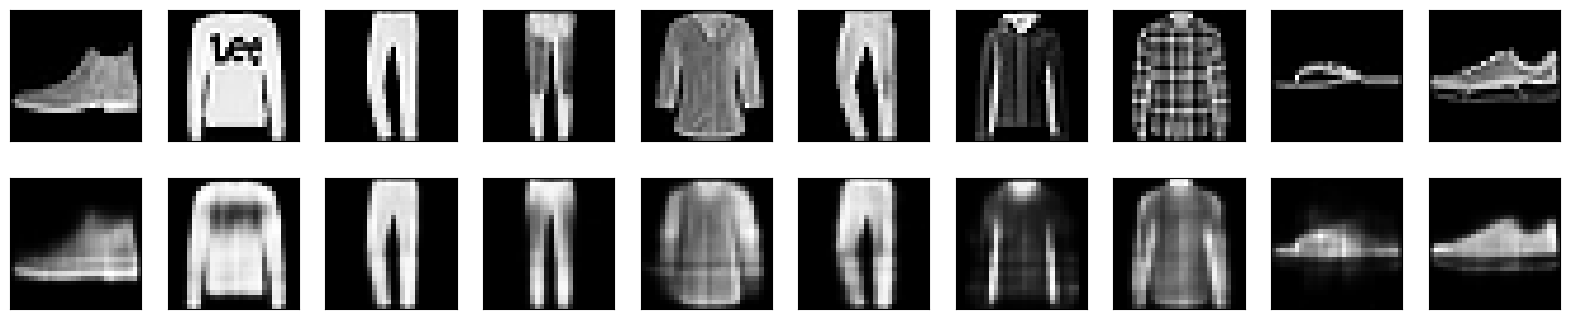

In [14]:
# encode and decode test images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# setting up visualization of results with matplotlib
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # displaying original test images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # displaying reconstructed images from autoencoder
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
# calculate MSE between original and reconstructed images
mse = mean_squared_error(x_test, decoded_imgs)
print("Mean Squared Error (MSE) on test set:", mse)

Mean Squared Error (MSE) on test set: 0.012712116


In [16]:
# Results:
#
# Compared to the MSE score from Monday's autoencoder activity, the score suggest a lower
# reconstruction accuracy. However, the MSE score is still low (below 0.05) suggesting that
# it contains a decently high reconstruction accuracy. Based on the images that are outputed,
# most of the reconstructed images are able to be identifiable. Although not as clear as the 
# digits from the autoencoder example.